In [1]:
# QCA 2D <Quantum Cellular Automata in 2-Dimention>
# Quantum Version of Conway's Game of Life
# Reversible Quantum Cellular Automata Circuit WITHOUT ADDER

# qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import *

# math
import numpy as np
import matplotlib.pyplot as plt

# sim
from qiskit.providers.basic_provider import BasicProvider
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.primitives import BackendSampler

# sim(MPS)
from qiskit import  transpile
from qiskit_aer import AerSimulator

# math & graph
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from   matplotlib import font_manager
from PIL import Image
from IPython.display import Image as IPImage
import IPython.display as display

In [2]:
from itertools import combinations 
#true falseの配列を作成
def generate_true_false_lists(length, true_count):
    # すべての可能な組み合わせを生成
    all_combinations = []
    for combo in combinations(range(length), true_count):
        new_list = [False] * length
        for index in combo:
            new_list[index] = True
        all_combinations.append(new_list)
    
    return all_combinations

#ルールパターンを生成
def make_rules(conditions,num_row,num_col,row,col):
    rules = list()
    if row == 0 & col == 0:
        rowlist = [row,row,row+1,row+1]
        rules.append(rowlist)
        collist = [col,col+1,col,col+1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)
    elif row == num_row & col == 0:
        rowlist = [row,row-1,row-1,row]
        rules.append(rowlist)
        collist = [col,col,col+1,col+1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)       
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)   
    elif row == 0 & col == num_col:
        rowlist = [row,row,row+1,row+1]
        rules.append(rowlist)
        collist = [col,col-1,col+1,col+1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)          
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)      
    elif row == num_row & col == num_col:
        rowlist =  [row,row-1,row-1,row]
        rules.append(rowlist)
        collist =  [col,col-1,col,col-1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:

                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)            
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(3,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)         
    elif row == 0:
        rowlist =[row,row,row,row+1,row+1,row+1]
        rules.append(rowlist)
        collist = [col,col-1,col+1,col-1,col,col+1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)              
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)    
    elif row == num_row:
        rowlist =[row,row-1,row-1,row-1,row,row]
        rules.append(rowlist)
        collist = [col,col-1,col,col+1,col-1,col+1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)                  
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)       
    elif col == 0:
        rowlist =[row,row-1,row-1,row,row+1,row+1]
        rules.append(rowlist)
        collist = [col,col,col+1,col+1,col,col+1]
        rules.append(collist) 
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)            
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists) 
    elif col == num_col:
        rowlist =[row,row-1,row-1,row,row+1,row+1]
        rules.append(rowlist)
        collist = [col,col-1,col,col-1,col-1,col]
        rules.append(collist)       
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)                   
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(5,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists)            
    else:
        rowlist = [row,row-1,row-1,row-1,row,row,row+1,row+1,row+1]
        rules.append(rowlist)
        collist = [col,col-1,col,col+1,col-1,col+1,col-1,col,col+1]
        rules.append(collist)
        for i in range(0,2):
            if i == 0: 
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(8,j)
                    for new_list in new_lists:
                        new_list.insert(0,True)
                    rules.extend(new_lists)               
            if i == 1:
                for j in conditions[i]:
                    new_lists = generate_true_false_lists(8,j)
                    for new_list in new_lists:
                        new_list.insert(0,False)
                    rules.extend(new_lists) 
    return rules

#cが複数の場合のnot処理
def cnnot(circ,n,ctrl,anc,tgt):
    # compute
    circ.ccx(ctrl[0], ctrl[1], anc[0])
    for i in range(2, n):
        circ.ccx(ctrl[i], anc[i-2], anc[i-1])

    # copy
    circ.cx(anc[n-2], tgt[0])

    # uncompute
    for i in range(n-1, 1, -1):
        circ.ccx(ctrl[i], anc[i-2], anc[i-1])
    circ.ccx(ctrl[0], ctrl[1], anc[0])

    return circ

#n/m二次元での表記を1字配列の量子に当てはめる
def convert_2d_to_1d(row, col, num_rows, num_cols):
    return row * num_cols + col

#量子の一次元配列を2次平面に変換
def convert_1d_to_2d(index, num_cols):
    row = index // num_cols
    col = index % num_cols
    return row, col

#パターンを実際に当てはめて、量子に書き込む
def add_rules(conditions,n,m,timesteps,circ,qpos,anc,cbit):
    #qpos = circ.qreg[0]
    #anc = circ.qreg(anc)[1]
    for timestep in range(timesteps-1):
        for i in range(n):
            for j in range(m):
                rules = make_rules(conditions,n,m,i,j) 
                for rule in rules[2:]:
                    ctrl = list()
                    for k in range(len(rule)):
                        ctrl.append(qpos[n * m* timestep + convert_2d_to_1d(rules[0][k],rules[1][k],n,m)])
                        if not rule[k]:
                            circ.x(qpos[n * m* timestep + convert_2d_to_1d(rules[0][k],rules[1][k],n,m)])
                    tgt = list()
                    tgt.append(qpos[n * m* (timestep+1) + convert_2d_to_1d(i,j,n,m)])
                    cnnot(circ,len(ctrl),ctrl,anc,tgt)
                    for k in range(len(rule)):
                        if not rule[k]:
                            circ.x(qpos[n * m* timestep + convert_2d_to_1d(rules[0][k],rules[1][k],n,m)])
    for i in range(0, timesteps * n * m):
        circ.measure(i,i)

In [3]:
# MPS : max 63 qbit
n = 4
m = 4
timesteps = 3
shots = 1024

qpos = QuantumRegister(n*m*timesteps,"qpos")
anc =  QuantumRegister(8,"anc")      # c8not for "moore neighborhood"
cbit = ClassicalRegister(n*m*timesteps,"cbit")
circ = QuantumCircuit(qpos,anc,cbit)

# ルール設定
conditions = [
    [2,3],       # Conditions to become live |1>
    [3]          # Conditions to become 
]                # Conditions to become                 : STAY

# 初期状態セット
# 4*4 block <strictStillLife>
#circ.x(qpos[5])
#circ.x(qpos[6])
#circ.x(qpos[9])
#circ.x(qpos[10])

# 5*5 blinker <oscillator>
#circ.x(qpos[11])
#circ.x(qpos[12])
#circ.x(qpos[13])

#4*4H entanglement <destructive>
circ.x(qpos[5])
circ.h(qpos[5])
circ.cx(qpos[5], qpos[0])
circ.cx(qpos[5], qpos[1])
circ.cx(qpos[5], qpos[2])
circ.cx(qpos[5], qpos[4])
circ.cx(qpos[5], qpos[6])
circ.cx(qpos[5], qpos[8])
circ.cx(qpos[5], qpos[9])
circ.cx(qpos[5], qpos[10])

# 回路作成 
add_rules(conditions,n,m,timesteps,circ,qpos,anc,cbit)

#---MPS
simulator = AerSimulator(method='matrix_product_state')
tcirc = transpile(circ, simulator)
result = simulator.run(tcirc).result()
#print("Time taken: {} sec".format(result.time_taken))
#result.get_counts()

In [4]:
#---results
counts = result.get_counts()

# Measure
measured_bit = max(counts, key=counts.get)
#print(counts)
#plot_histogram(counts)

# Measure Every Qubit
grid = np.zeros((n * timesteps, m ))
for bitstring, cnt in counts.items():
    prob = cnt / shots
    for idx, c in enumerate(reversed(bitstring)):
        if c == '1':
            grid[idx // n, idx % n] += prob

#print(f'#---{shots}回計測後のgrid \n{grid}') # 調査用

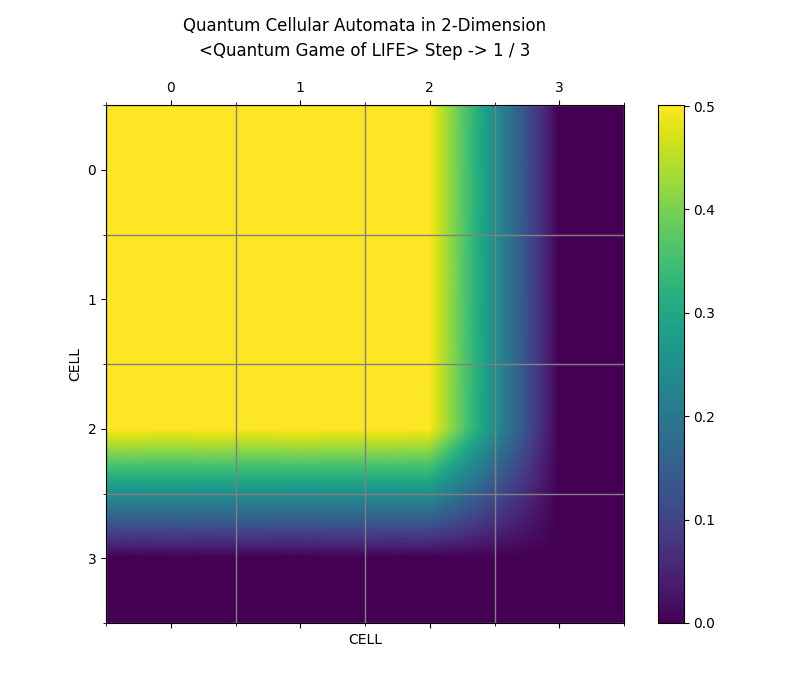

In [5]:
# Draw Everyting
#print(f'#---{shots}回計測後のgrid \n{grid}') # 調査用
#grid = np.random.rand(n * timesteps, m)
#print(f'len:{len(grid)}')

# Font settings for linux(OpenSuse Tumbleweed)
font_path = "/usr/share/fonts/truetype/NotoSans-Regular.ttf"
font_prop = font_manager.FontProperties(fname=font_path)

# Function to create the grid and animate it
def create_grid_animation(grid, timesteps, n, m):
    fig, ax = plt.subplots(figsize=(8, 7))  # Increase the overall size of the image
    fig.subplots_adjust(top=0.85, left=0.1, right=0.95)  # Adjust margins to fit the graph and reduce left and right margins
    #cax = ax.matshow(grid[0], cmap='viridis', interpolation='bilinear', vmin=0, vmax=1)
    cax = ax.matshow(grid[0], cmap='viridis', interpolation='bilinear')
    fig.colorbar(cax)
    ax.set_xlabel('CELL')
    ax.set_ylabel('CELL')

    def update(frame):
        cax.set_array(grid[frame])
        ax.set_title(f'Quantum Cellular Automata in 2-Dimension\n<Quantum Game of LIFE> Step -> {frame+1} / {timesteps}', pad=35)  # Adjust pad to move the title
        ax.set_xticks(np.arange(-.5, n, 1), minor=True)
        ax.set_yticks(np.arange(-.5, m, 1), minor=True)
        ax.title.set_multialignment('center')
        ax.title.set_linespacing(1.5)  # Increase line spacing
        ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)
        fig.canvas.draw()
        return [cax]

    ani = FuncAnimation(fig, update, frames=timesteps, blit=True)
    
    images = []
    for i in range(timesteps):
        update(i)
        image = np.frombuffer(fig.canvas.buffer_rgba(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
        image = image[:, :, :3]  # Remove the alpha channel
        images.append(Image.fromarray(image))

    # Save the list of images as a single PNG video
    images[0].save('./images/qca2dim/qca_2d_animation.png', save_all=True, append_images=images[1:], duration=500, loop=0)    
    return './images/qca2dim/qca_2d_animation.png'

def divide_grid(grid, timesteps, n, m):
    divided_grid = []
    for t in range(timesteps):
        divided_grid.append(grid[t*m:(t+1)*m])
        #print(f'Timestep {t+1}:\n{divided_grid[t]}\n')
    return divided_grid

# Divide the grid into timesteps
divided_grid = divide_grid(grid, timesteps, n, m)

# Create the animation and save it to a PNG video file
video_path = create_grid_animation(divided_grid, timesteps, n, m)
plt.close()

# Display animation
output_file_final_image="./images/qca2dim/qca_2d_animation.png"
with open(output_file_final_image, 'rb') as f:
    display.display(display.Image(data=f.read(), format='png'))

In [6]:
import qiskit
qiskit.__version__

'1.1.0'